In [11]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression

from custom_libs import db
from custom_libs import preprocessing
from custom_libs import classification
from custom_libs import dump
from custom_libs import plotting

In [13]:
df = db.get_dataset("chat_dataset")
df.head(2)

,message,sentiment
0,I really enjoyed the movie,positive
1,The food was terrible,negative


In [14]:
x_column_name = "message"
x_column_cleaned_name = x_column_name + "_clean"

In [15]:
proprocessing_function = preprocessing.preprocess_text
preprocessing.preprocess_dataframe(df, x_column_name, x_column_cleaned_name, proprocessing_function)
df.head(2)

,message,sentiment,message_clean
0,I really enjoyed the movie,positive,really enjoy movie
1,The food was terrible,negative,food terrible


In [5]:
df['sentiment'] = df['sentiment'].apply(
    lambda x: classification.Sentiment.NEGATIVE if x == "negative" else x)
df['sentiment'] = df['sentiment'].apply(
    lambda x: classification.Sentiment.POSITIVE if x == "positive" else x)
df['sentiment'] = df['sentiment'].apply(
    lambda x: classification.Sentiment.NEUTRAL if x == "neutral" else x)

df.sample(5)

,message,sentiment,message_clean
557,I need to water my plants before I leave for w...,Neutral,need water plant leave work
291,I'm really happy with my purchase,Positive,really happy purchase
302,The service at this restaurant was excellent,Positive,service restaurant excellent
575,I lost my credit card and someone just charged...,Negative,lose credit card someone charge
112,The hike was invigorating,Positive,hike invigorate


In [ ]:
# classification.append_sentiment_for_each_row(df, x_column_cleaned_name, new_column_name='sentiment')
# df.head(3)

In [6]:
X, y = df[x_column_cleaned_name], df['sentiment']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Accuracy for PassiveAggressiveClassifier with vectorizer CountVectorizer: 0.7264957264957265
Accuracy for PassiveAggressiveClassifier with vectorizer TfidfVectorizer: 0.7350427350427351
Accuracy for PassiveAggressiveClassifier with vectorizer TfidfVectorizer - Max freq.=0.8 - Unigram: 0.7264957264957265
Accuracy for PassiveAggressiveClassifier with vectorizer TfidfVectorizer - Max freq.=0.8 - Bigram: 0.7606837606837606
Accuracy for PassiveAggressiveClassifier with vectorizer TfidfVectorizer - Max freq.=0.8 - Trigram: 0.7692307692307693


Accuracy for LogisticRegression with vectorizer CountVectorizer: 0.8205128205128205
Accuracy for LogisticRegression with vectorizer TfidfVectorizer: 0.7863247863247863
Accuracy for LogisticRegression with vectorizer TfidfVectorizer - Max freq.=0.8 - Unigram: 0.7863247863247863
Accuracy for LogisticRegression with vectorizer TfidfVectorizer - Max freq.=0.8 - Bigram: 0.7777777777777778
Accuracy for LogisticRegression with vectorizer TfidfVectorizer - Max

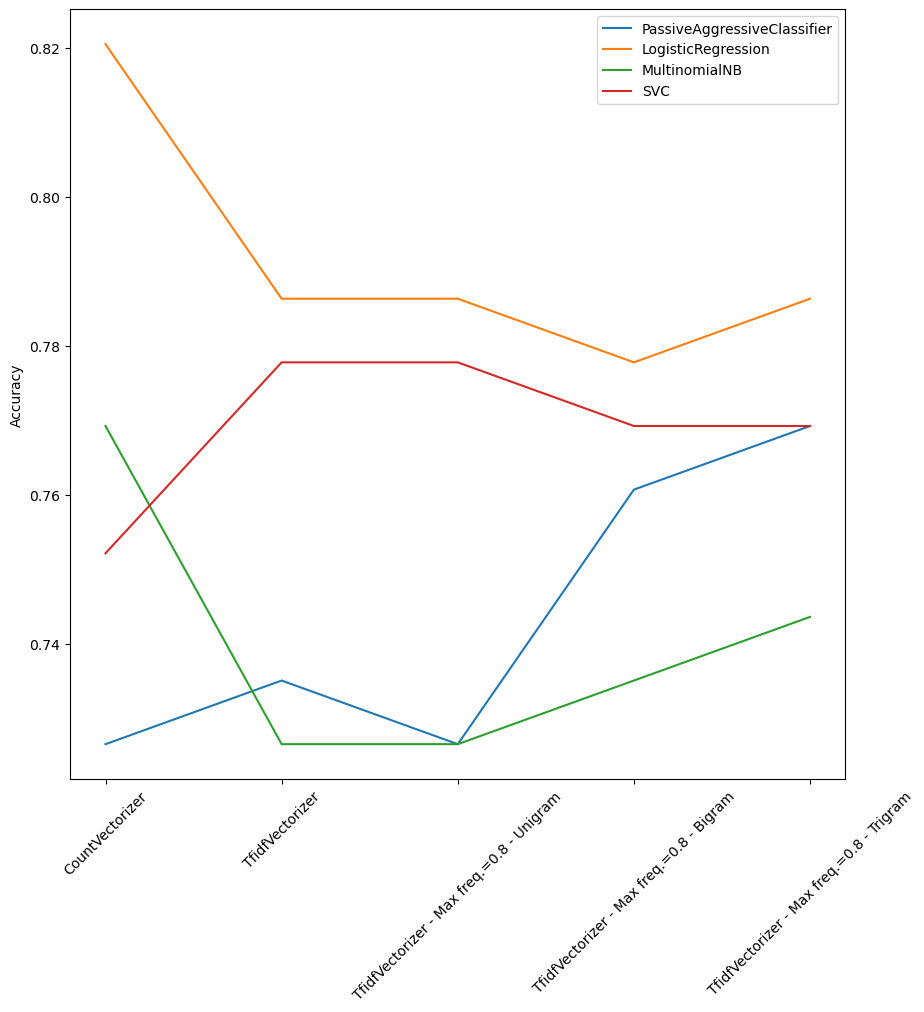

In [43]:
vectorizers = list()
vectorizers.append(CountVectorizer(stop_words='english'))
vectorizers.append(TfidfVectorizer(stop_words='english'))
vectorizers.append(TfidfVectorizer(stop_words='english', max_df=0.8))
vectorizers.append(TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,2)))
vectorizers.append(TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,3)))

automl = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=120, per_run_time_limit=30)
models = [PassiveAggressiveClassifier, LogisticRegression, MultinomialNB, SVC]
labels_vectorizers = ['CountVectorizer', 'TfidfVectorizer', 'TfidfVectorizer - Max freq.=0.8 - Unigram', 
                      'TfidfVectorizer - Max freq.=0.8 - Bigram', 'TfidfVectorizer - Max freq.=0.8 - Trigram']

results_accuracies = classification.test_classifiers(models, vectorizers, labels_vectorizers, x_train, x_test, y_train, y_test)


plotting.plot_accuracies(results_accuracies, labels_vectorizers)



In [3]:
#                                               ********** DON'T RUN THIS PART **********
#
#TRYING TO USE AUTOSKLEARN ->
#   THIS DOESN'T WORK (COMPATIBILITY ISSUES)): 
#   
#   ValueError: (' Dummy prediction failed with run state StatusType.CRASHED and additional output: 
#                   {\'error\': \'Result queue is empty\', \'exit_status\': "", \'subprocess_stdout\': 
#                       \'\', \'subprocess_stderr\': \'Process pynisher function call:\\nTraceback (most recent call last):\\n  
#                   File "/Users/michele/anaconda3/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap\\n    
#                   self.run()\\n  File "/Users/michele/anaconda3/lib/python3.10/multiprocessing/process.py", line 108, in run\\n    
#                   self._target(*self._args, **self._kwargs)\\n  File "/Users/michele/anaconda3/lib/python3.10/site-packages/pynisher/limit_function_call.py", line 108, in subprocess_func\\n    
#                   resource.setrlimit(resource.RLIMIT_AS, (mem_in_b, mem_in_b))\\nValueError: current limit exceeds maximum limit\\n\', \'exitcode\': 1, \'configuration_origin\': \'DUMMY\'}.',)


import autosklearn.classification
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of AutoSklearnClassifier
automl = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=60, per_run_time_limit=10)

# Fit the AutoSklearnClassifier to the training data
automl.fit(X_train, y_train)

# Generate predictions on the test set
y_pred = automl.predict(X_test)

# Print the accuracy score of the classifier
accuracy = (y_pred == y_test).sum() / len(y_test)
print("Accuracy:", accuracy)


[ERROR] [2023-07-10 15:16:12,352:Client-AutoML(1):f055a294-1f23-11ee-a88a-722d0cb926f8] (' Dummy prediction failed with run state StatusType.CRASHED and additional output: {\'error\': \'Result queue is empty\', \'exit_status\': "<class \'pynisher.limit_function_call.AnythingException\'>", \'subprocess_stdout\': \'\', \'subprocess_stderr\': \'Process pynisher function call:\\nTraceback (most recent call last):\\n  File "/Users/michele/anaconda3/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap\\n    self.run()\\n  File "/Users/michele/anaconda3/lib/python3.10/multiprocessing/process.py", line 108, in run\\n    self._target(*self._args, **self._kwargs)\\n  File "/Users/michele/anaconda3/lib/python3.10/site-packages/pynisher/limit_function_call.py", line 108, in subprocess_func\\n    resource.setrlimit(resource.RLIMIT_AS, (mem_in_b, mem_in_b))\\nValueError: current limit exceeds maximum limit\\n\', \'exitcode\': 1, \'configuration_origin\': \'DUMMY\'}.',)
[ERROR] [2023-0

ValueError: (' Dummy prediction failed with run state StatusType.CRASHED and additional output: {\'error\': \'Result queue is empty\', \'exit_status\': "<class \'pynisher.limit_function_call.AnythingException\'>", \'subprocess_stdout\': \'\', \'subprocess_stderr\': \'Process pynisher function call:\\nTraceback (most recent call last):\\n  File "/Users/michele/anaconda3/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap\\n    self.run()\\n  File "/Users/michele/anaconda3/lib/python3.10/multiprocessing/process.py", line 108, in run\\n    self._target(*self._args, **self._kwargs)\\n  File "/Users/michele/anaconda3/lib/python3.10/site-packages/pynisher/limit_function_call.py", line 108, in subprocess_func\\n    resource.setrlimit(resource.RLIMIT_AS, (mem_in_b, mem_in_b))\\nValueError: current limit exceeds maximum limit\\n\', \'exitcode\': 1, \'configuration_origin\': \'DUMMY\'}.',)

In [ ]:
# Best combination of model and vectorizer
vectorizer = CountVectorizer(stop_words='english')
x_train_trasformed = vectorizer.fit_transform(x_train)
x_test_trasformed = vectorizer.transform(x_test)

class_names = classification.Sentiment.get_all()
model = classification.test_classifier(LogisticRegression, x_train_trasformed, x_test_trasformed, y_train, y_test, class_names)

In [9]:
dump.save_model(model, "model_chat")
dump.save_vectorizer(vectorizer, "vectorizer_chat")

Saving model at: dump_models/model_chat.pkl
Saving vectorizer at: dump_models/vectorizer_chat.pkl
